<a href="https://colab.research.google.com/github/JoaquinGonzalezSimon/Data_science_and_ML_from_Medium/blob/main/220908_Bitcoin_Price_Prediction_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### This project was taken from the following link and I use it to practice my skills

https://thecleverprogrammer.com/2021/01/05/bitcoin-price-prediction-with-python/

https://medium.com/coders-camp/180-data-science-and-machine-learning-projects-with-python-6191bc7b9db9

In [1]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [16]:
import pandas as pd
from fbprophet import Prophet
from datetime import date, timedelta
import yfinance as yf
import mplfinance as mpf

In [5]:
ticker = 'BTC-USD'

In [6]:
end_date = date.today().strftime('%Y-%m-%d')
end_date

'2022-09-08'

In [7]:
start_date = date.today() - timedelta(365)
start_date = start_date.strftime('%Y-%m-%d')
start_date

'2021-09-08'

In [8]:
yf.download(ticker, start=start_date, end=end_date, progress=True)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,46091.390625,49007762488
2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,46391.421875,38672657013
2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,44883.910156,39154666597
2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,45201.457031,34499835245
2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,46063.269531,27881980161
...,...,...,...,...,...,...
2022-09-03,19969.718750,20037.009766,19698.355469,19832.087891,19832.087891,23613051457
2022-09-04,19832.470703,19999.689453,19636.816406,19986.712891,19986.712891,25245861652
2022-09-05,19988.789062,20031.160156,19673.046875,19812.371094,19812.371094,28813460025


In [9]:
data = yf.Ticker(ticker).history(period='12mo')
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-09-08 to 2022-09-08
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          366 non-null    float64
 1   High          366 non-null    float64
 2   Low           366 non-null    float64
 3   Close         366 non-null    float64
 4   Volume        366 non-null    int64  
 5   Dividends     366 non-null    int64  
 6   Stock Splits  366 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 22.9 KB


In [10]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-08,46827.761719,47334.054688,44561.394531,46091.390625,49007762488,0,0
2021-09-09,45774.742188,47261.949219,45669.738281,46391.421875,38672657013,0,0
2021-09-10,46396.664062,47031.742188,44344.484375,44883.910156,39154666597,0,0
2021-09-11,44869.839844,45969.292969,44818.265625,45201.457031,34499835245,0,0
2021-09-12,45206.628906,46364.878906,44790.460938,46063.269531,27881980161,0,0


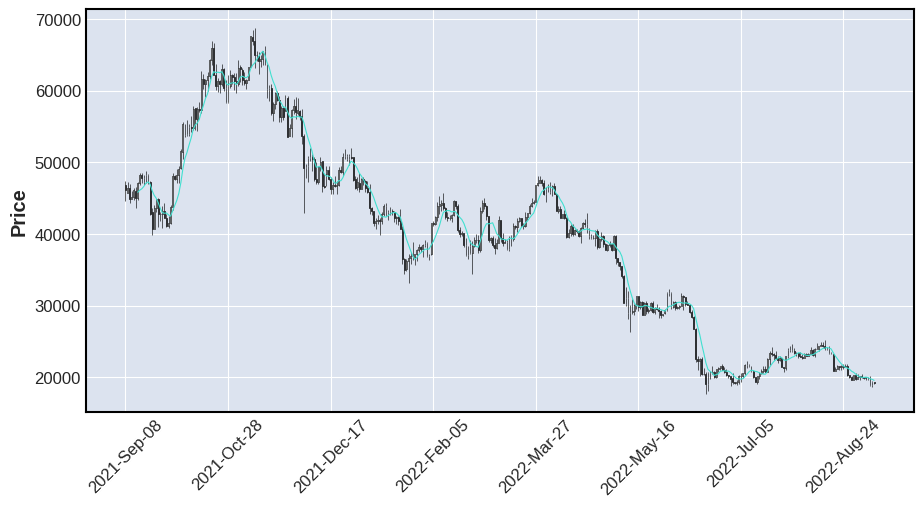

In [11]:
mpf.plot(data, type='candle', mav=(7), figratio=(20,10))

In [21]:
df = data.reset_index(drop=False)[['Date', 'Close']]
df.columns = ['ds', 'y']
df

,ds,y
0,2021-09-08,46091.390625
1,2021-09-09,46391.421875
2,2021-09-10,44883.910156
3,2021-09-11,45201.457031
4,2021-09-12,46063.269531
...,...,...
361,2022-09-04,19986.712891
362,2022-09-05,19812.371094
363,2022-09-06,18837.667969
364,2022-09-07,19290.324219


In [22]:
model = Prophet()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      366 non-null    datetime64[ns]
 1   y       366 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [24]:
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = model.make_future_dataframe(periods=60)
future

,ds
0,2021-09-08
1,2021-09-09
2,2021-09-10
3,2021-09-11
4,2021-09-12
...,...
421,2022-11-03
422,2022-11-04
423,2022-11-05
424,2022-11-06


In [32]:
forecast = model.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-08,42516.805386,39468.614209,46425.883648,42516.805386,42516.805386,289.027834,289.027834,289.027834,289.027834,289.027834,289.027834,0.0,0.0,0.0,42805.833221
1,2021-09-09,42891.512400,39489.503323,46219.151168,42891.512400,42891.512400,13.051941,13.051941,13.051941,13.051941,13.051941,13.051941,0.0,0.0,0.0,42904.564341
2,2021-09-10,43266.219413,40142.404696,46583.327348,43266.219413,43266.219413,-228.445245,-228.445245,-228.445245,-228.445245,-228.445245,-228.445245,0.0,0.0,0.0,43037.774168
3,2021-09-11,43640.926427,40116.019698,47106.903437,43640.926427,43640.926427,-141.587705,-141.587705,-141.587705,-141.587705,-141.587705,-141.587705,0.0,0.0,0.0,43499.338722
4,2021-09-12,44015.633440,40521.966983,47729.703956,44015.633440,44015.633440,-14.445675,-14.445675,-14.445675,-14.445675,-14.445675,-14.445675,0.0,0.0,0.0,44001.187766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,2022-11-03,19631.130777,12849.882548,26213.434429,13890.828250,25937.083955,13.051941,13.051941,13.051941,13.051941,13.051941,13.051941,0.0,0.0,0.0,19644.182718
422,2022-11-04,19610.108081,12035.656395,26487.255832,13625.640855,26074.248932,-228.445245,-228.445245,-228.445245,-228.445245,-228.445245,-228.445245,0.0,0.0,0.0,19381.662836
423,2022-11-05,19589.085386,12358.213765,26426.881337,13392.066311,26174.781746,-141.587705,-141.587705,-141.587705,-141.587705,-141.587705,-141.587705,0.0,0.0,0.0,19447.497680
424,2022-11-06,19568.062690,12659.861027,27242.581080,13171.671054,26303.325058,-14.445675,-14.445675,-14.445675,-14.445675,-14.445675,-14.445675,0.0,0.0,0.0,19553.617015


In [33]:
pred = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
pred.tail()

,ds,yhat,yhat_lower,yhat_upper
421,2022-11-03,19644.182718,12849.882548,26213.434429
422,2022-11-04,19381.662836,12035.656395,26487.255832
423,2022-11-05,19447.497680,12358.213765,26426.881337
424,2022-11-06,19553.617015,12659.861027,27242.581080
425,2022-11-07,19553.775341,11965.659665,27160.619776


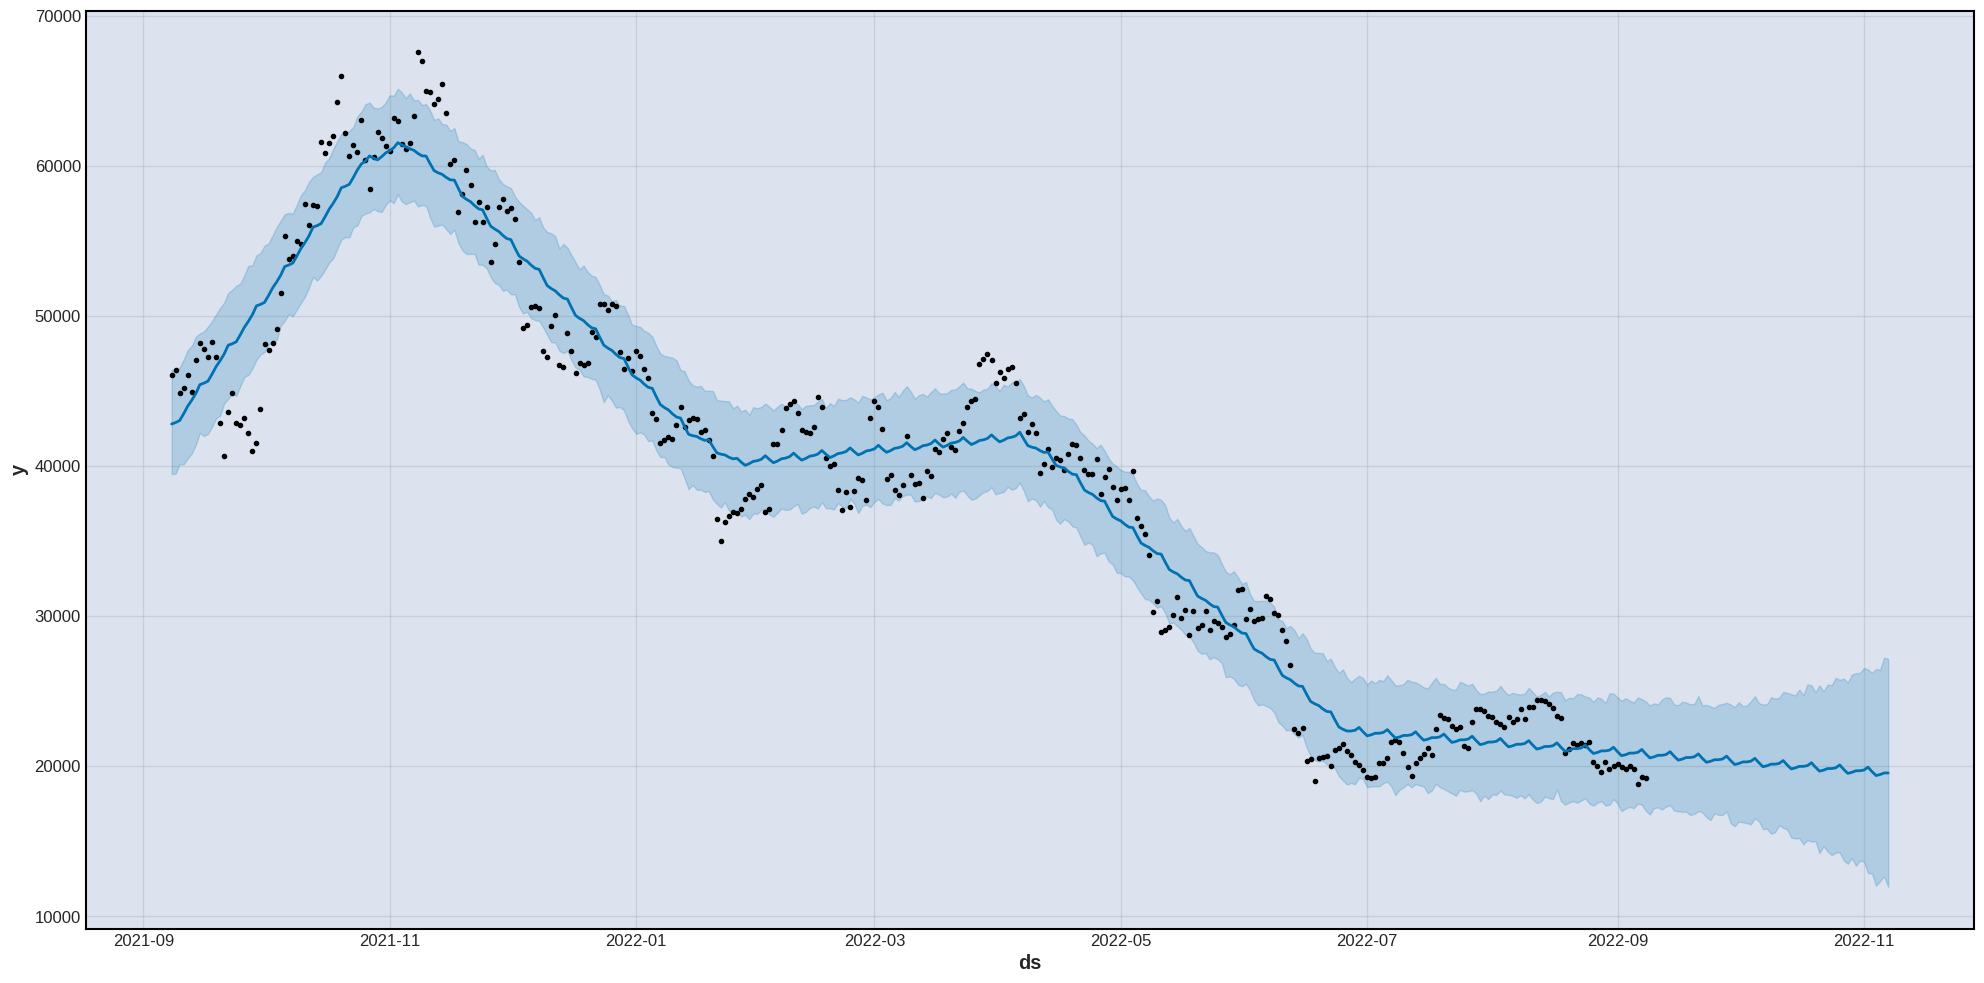

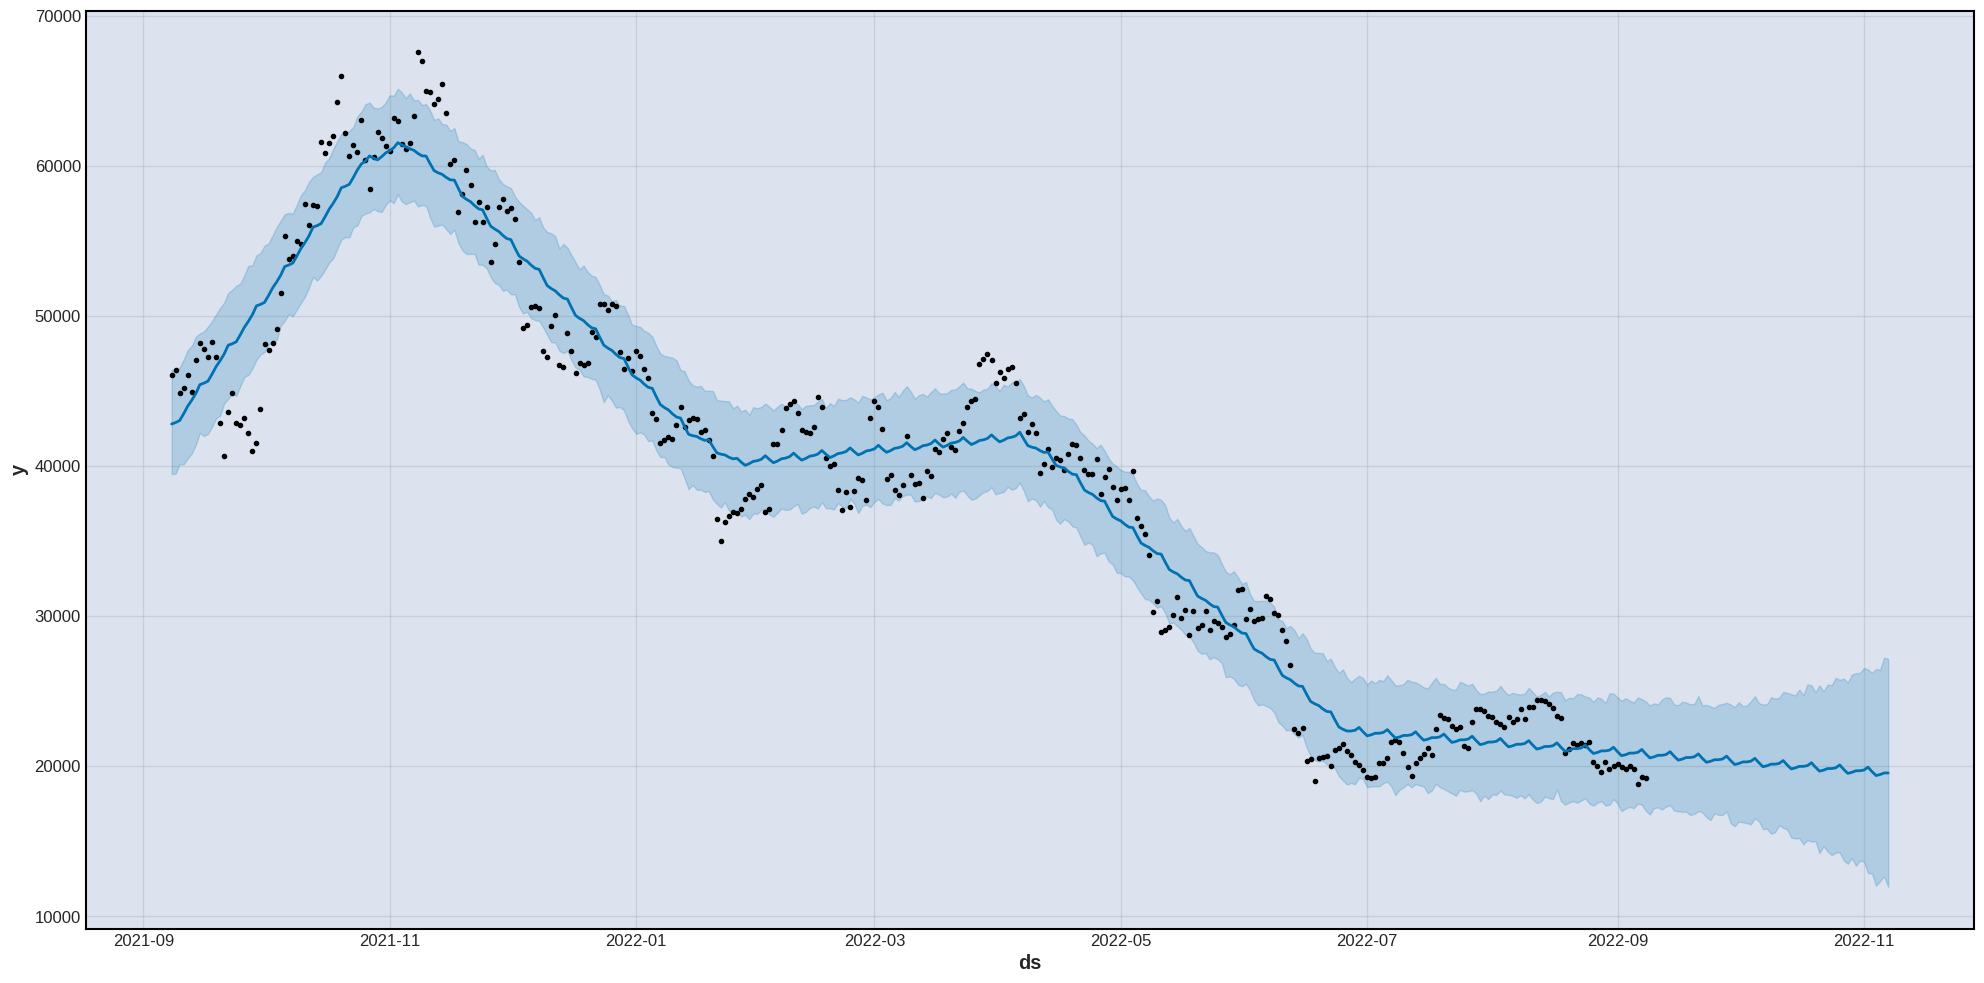

In [34]:
from fbprophet.plot import plot
model.plot(pred, figsize=(20,10))